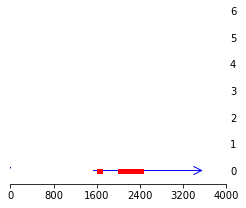

In [69]:
'''
测试数据

转录本数目：5
geneName： Top1
基因范围: 1000-3000


'''



import numpy  as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as lines


fig=plt.figure(1)
arr='->'  ##正链标志

ax=fig.add_axes([0.2,0.2,0.5,0.6]) ##指定绘图区域，第一个为左上角起始位置，第二个为左下角起始位置，第三位图片宽度，第四个为图片高度

####绘制箭头
arrow=mpatches.FancyArrowPatch(
(0,0.1), ##起始位置坐标
(1,0.1), ##终止位置坐标
arrowstyle=arr,
mutation_scale=20, ##箭头缩放比例
lw=1, 
color='b',
antialiased=True
)
ax.add_patch(arrow)

#######绘制坐标轴标签和刻度线#########

###提取基因坐标，从而设置X轴的取值范围

ax.set_xlim([0,4000])

###根据转录本的数目这种y轴范围

ax.set_ylim([-0.5,5+1])

##使用np，固定显示的刻度label数目
ax.set_xticks(np.linspace(0,4000,6))
##y轴显示转录本名称，并且隐藏刻度，名称放在箭头的另外一边

###控制坐标轴是否显示, spines 骨脊
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
##控制刻度以及label显示在哪一边
ax.get_yaxis().tick_right()  
ax.get_xaxis().tick_bottom()
##隐藏y轴刻度只显示label，x轴则显示刻度并且朝外
ax.tick_params(axis=u'y', which=u'both',length=0)
ax.tick_params(axis=u'y', which=u'both',direction='out')


######坐标轴画好后，开始绘制转录本##########


####首先绘制转录本长度线
###y轴用转录本的索引表示,第二个转录本
number=0
transcript2=[(1500,3600),(number,number)]
(line_start,line_end)=zip(*transcript2)  ##获取x轴范围与y轴范围的元组

arrow=mpatches.FancyArrowPatch(
    line_start, ##起始位置
    line_end,  ##终止位置
    arrowstyle=arr,
    mutation_scale=20, ##箭头缩放比例
    lw=1, 
    color='b',
    antialiased=True
)
ax.add_patch(arrow)


#####绘制各种注释元件######
####同样是line2D对应，只不过元件的高度固定为5
element_width=5
element1=[(1700,number),(1600,number)] ##第一个外显子
element2=[(2000,number),(2450,number)] ##第二个外显子
(linex,liney)=zip(*element1)
ax.add_line(lines.Line2D(
    linex, ##x轴显示范围
    liney,  ##y轴显示范围
    linewidth=element_width,
    solid_capstyle = 'butt', 
    solid_joinstyle='miter',
    antialiased=False,
    color='red'))
(linex,liney)=zip(*element2)
ax.add_line(lines.Line2D(
    linex, ##x轴显示范围
    liney,  ##y轴显示范围
    linewidth=element_width,
    solid_capstyle = 'butt', 
    solid_joinstyle='miter',
    antialiased=False,
    color='red'))

###添加图例信息
#ax_legend = fig.add_axes([0.76,0.2,0.2,0.6])
###保存图片信息
fig.savefig('test.pdf',dpi=150)